In [11]:
import pandas as pd
import matplotlib.pyplot as pt

In [12]:
# tratamento de dados Fis3

a = open("fis3_brute.txt",'r')
b = open("fis3_clean.txt",'w')

for linha in a :
    if linha.strip() == '' : continue 
    b.write(linha)

a.close()
b.close()

b = open("fis3_clean.txt",'r')

cont = 0
sample = []

data = {}
for linha in b:
    if cont==5 :
        data[sample[1]] = sample[:1] + sample[2:]
        sample = []
        cont = 0
    sample.append(linha)
    cont+=1

df = pd.DataFrame.from_dict(data,orient="index")

df = df.map(lambda x: x.replace('\n', '') if isinstance(x, str) else x)
df.index = [idx.replace('\n', '') for idx in df.index]

df.columns = df.iloc[0]
df = df[1:]

def to_float(x):
    try:
        return float(x)
    except :
        return 0

df["T1"] = df["T1"].map(lambda x: to_float(x))
df["P1"] = df["P1"].map(lambda x: to_float(x))
df["T2"] = df["T2"].map(lambda x: to_float(x))

print(df)

df.to_excel("Fis3.xlsx")


DRE                               Aluno    T1   P1    T2
118029954                AARON HOROWITZ   2.5  0.0   5.0
121066101         ABRAAO CARVALHO GOMES   0.0  4.8   0.0
117074396          ABRAHAM BANAFO AMPAH   5.0  0.0   7.5
118156484     ADRIELLY DA SILVA BALBINO  10.0  2.3   7.5
121103181  AFONSO MATEUS DA SILVA PINTO   5.0  0.0   0.0
...                                 ...   ...  ...   ...
121043187      WESLEY GONCALVES PEREIRA  10.0  1.3   7.5
123467272     YAN CHESTER REIS CATALANI  10.0  1.7  10.0
120042950        YAN NASCIMENTO FURTADO   2.5  3.4  10.0
120158125          YAN TORRES ASSUMPCAO   0.0  0.0   0.0
123520054      YURI ANTUNES CONSTANTINO   0.0  4.0   0.0

[608 rows x 4 columns]


In [13]:
# tratamento de dados Calc3

a = open("calc3_brute.txt",'r')
b = open("calc3_clean.txt",'w')
for linha in a : b.write(linha.replace(',','.'))

a.close()
b.close()
    
def juntar(lista):
    palavra = ""
    for item in lista:
        palavra += item + " "
    return palavra

a = open("calc3_clean.txt",'r')

cont = 0
sample = []

data = {}
for linha in a:
    linha = linha.split()
    if( to_float(linha[-1]) < 10 ):
        data[linha[0]] = [juntar(linha[1:-1])] + [linha[-1]]
    else:
        data[linha[0]] = [juntar(linha[1:])] + [0]

df = pd.DataFrame.from_dict(data,orient="index")
df.columns = df.iloc[0]
df = df[1:]

df["P1"] = df["P1"].map(lambda x: to_float(x))

print(df)

df.to_excel("Calc3.xlsx")


DRE                              Turma    P1
121175293                        13928   0.0
123705921                        13928   2.2
122150589                        13928   1.3
120184273                        13928   0.0
121127795                        13928   0.0
...                                 ...  ...
121082717  semi presencial tarde 13933   0.0
120188586  semi presencial tarde 13933   0.0
123751354  semi presencial tarde 13933   1.5
117030839  semi presencial tarde 13933   0.0
122093818  semi presencial tarde 13933   1.5

[553 rows x 2 columns]


In [14]:
# funcoes de comparacao
def entre(dx):
    def f(x,p):
        return (x >= (p-dx/2) and x <= (p+dx/2) )
    return f

def menor(x,p): return (x < p)

def maior(x,p): return (x > p)

In [15]:
# funcao principal
def dados(dataframe,f) :

    data = pd.read_excel(dataframe)

    x = []
    y = []

    for i in range(100) :
        x.append(i+1)
        y.append(0)

    for item in data["P1"]:
        for i in range(100):
            if f(item,(i+1)/10) :
                y[i]+=1

    for i in range(len(y)) : 
        y[i] = y[i]/len(data["P1"])*100
        x[i] = x[i]/10

    pt.plot(x,y,color="black")
    pt.scatter(x,y,marker='.',color="black")
    pt.title(dataframe)
    pt.xlabel("nota x")
    pt.ylabel("% de alunos")
    pt.show()

    return

calc3:
count    553.000000
mean       2.507233
std        2.344965
min        0.000000
25%        0.000000
50%        2.100000
75%        4.000000
max        9.500000
Name: P1, dtype: float64

fis3:
count    608.000000
mean       2.294901
std        1.900990
min        0.000000
25%        0.200000
50%        2.000000
75%        3.400000
max        9.700000
Name: P1, dtype: float64


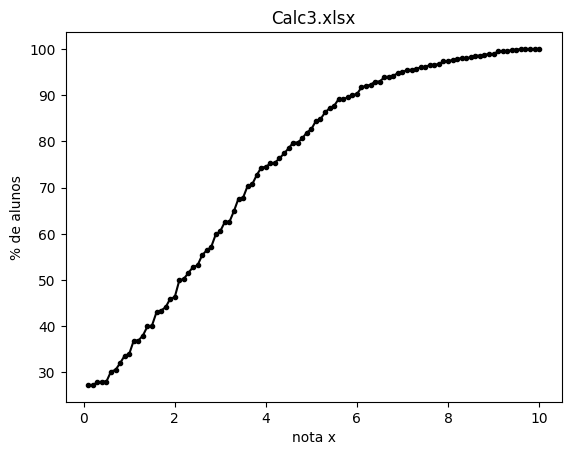

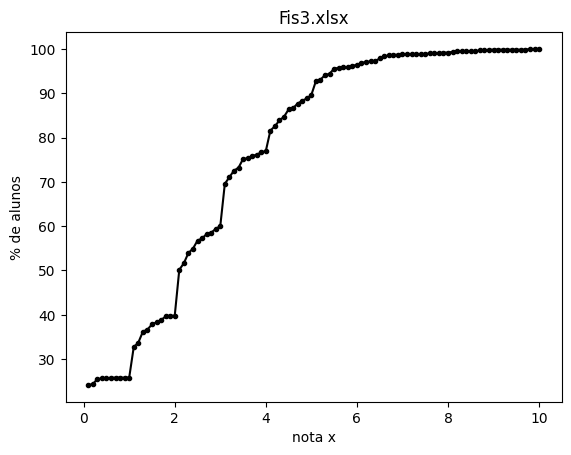

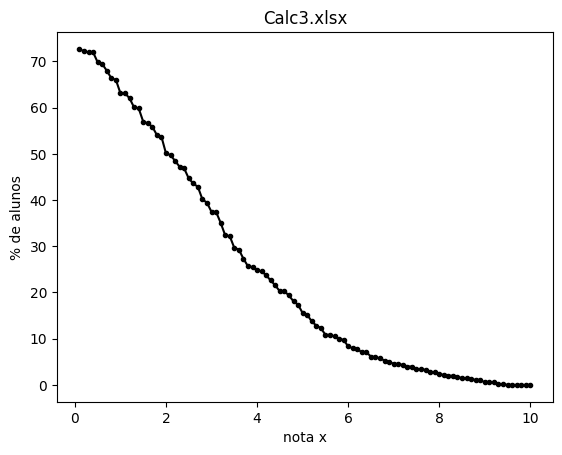

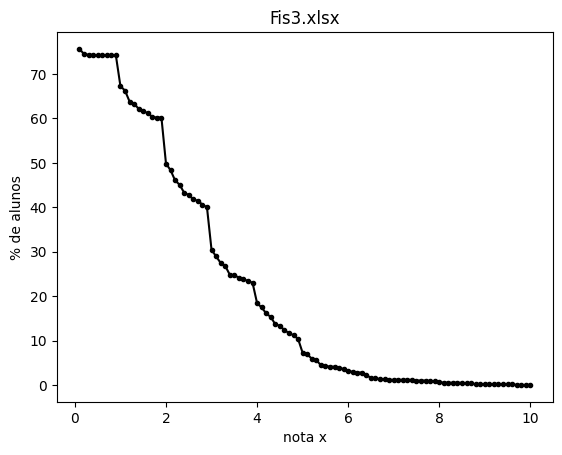

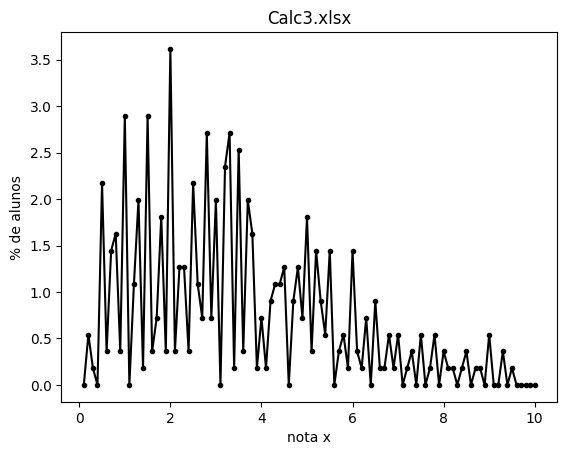

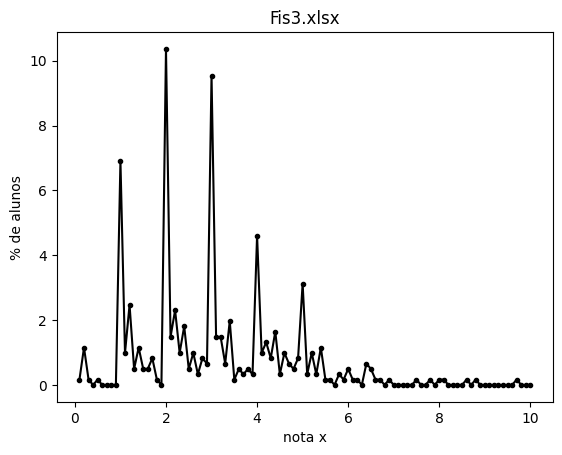

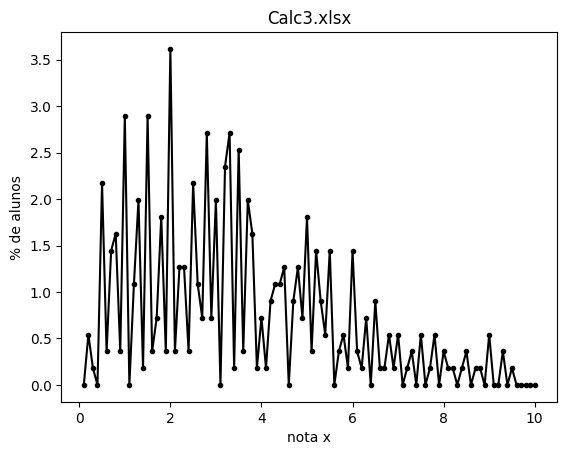

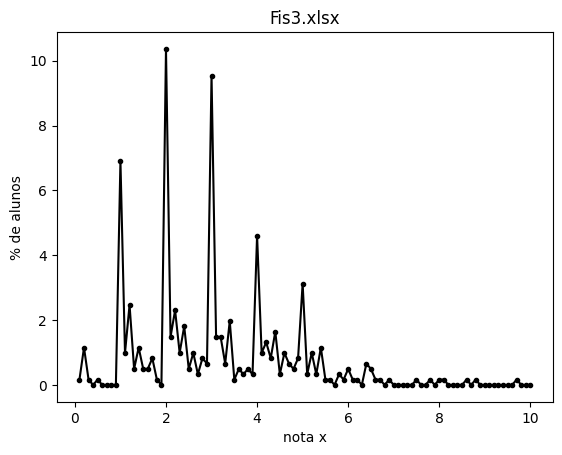

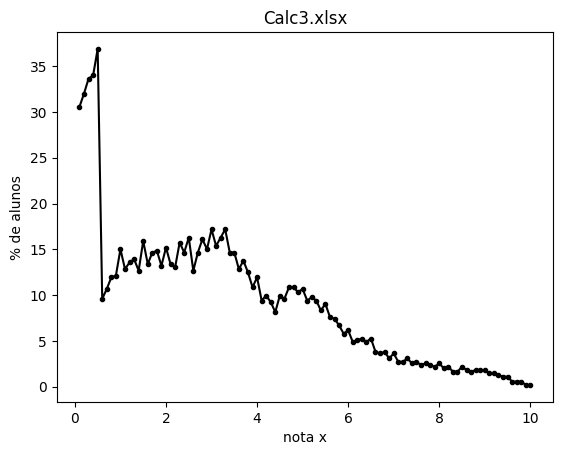

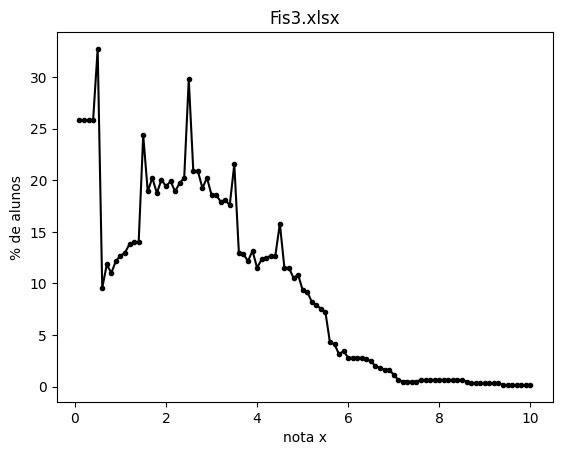

In [16]:
calc3 = pd.read_excel("Calc3.xlsx")
fis3 = pd.read_excel("Fis3.xlsx")

print("calc3:")
print(calc3["P1"].describe())
print("\nfis3:")
print(fis3["P1"].describe())

dados("Calc3.xlsx", menor )
dados("Fis3.xlsx", menor )

dados("Calc3.xlsx", maior )
dados("Fis3.xlsx", maior )

dados("Calc3.xlsx", entre(0) )
dados("Fis3.xlsx", entre(0) )

dados("Calc3.xlsx", entre(0.1) )
dados("Fis3.xlsx", entre(0.1) )

dados("Calc3.xlsx", entre(1) )
dados("Fis3.xlsx", entre(1) )